<a href="https://colab.research.google.com/github/timotdsantos/Auto_Data_Science_Challenge/blob/master/Fantasy_Points_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install PyDrive
!git clone https://github.com/timotdsantos/SportsPredict.git

    100% |████████████████████████████████| 993kB 7.3MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive
Cloning into 'SportsPredict'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict


In [7]:
cd SportsPredict/


/content/SportsPredict


In [8]:
rb = pd.read_csv('rb_gb_copy.csv', index_col=0)
display(rb.head())
display(rb.columns)

,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,...,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C,PTS,GAB
Player Name,,,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,...,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2,30.6,G
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,...,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5,3.7,B
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,...,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4,8.1,B
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,...,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9,14.0,A
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,...,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6,14.5,A


Index(['Vegas_Pts', 'Vegas_Spread', 'DEf_Pass', 'DEF_Rush', 'DEF_DvP', 'L3',
       'S', 'P', 'RZ', 'YPA', 'Targets_L3', 'Targets_S', 'Targets_P',
       'Targets_RZ', 'Targets_YPT', 'FP_L3', 'FP_S', 'FP_F', 'FP_C', 'PTS',
       'GAB'],
      dtype='object')

In [9]:
X = rb.drop(["GAB"], axis=1)
y = rb["GAB"]
print(X.shape, y.shape)

(24, 20) (24,)


In [10]:
X_pts = X.drop("PTS",axis=1)
Y_pts = X["PTS"]

display(X_pts.head())
display(X_pts.shape)
display(Y_pts.head())

,Vegas_Pts,Vegas_Spread,DEf_Pass,DEF_Rush,DEF_DvP,L3,S,P,RZ,YPA,Targets_L3,Targets_S,Targets_P,Targets_RZ,Targets_YPT,FP_L3,FP_S,FP_F,FP_C
Player Name,,,,,,,,,,,,,,,,,,,
1,30.0,8.0,0.09,-0.10,0.14,22.3,21.5,21.0,6.2,4.8,5.3,5.0,5.4,1.8,8.2,32.8,31.0,25.8,36.2
2,21.0,1.0,-0.08,-0.17,-0.20,23.0,19.5,19.4,2.3,5.0,4.0,5.0,4.3,0.8,5.5,24.7,21.7,13.9,29.5
3,25.5,-6.0,0.33,0.17,0.48,18.0,17.8,16.9,3.0,4.7,4.0,4.8,5.1,0.5,5.2,16.2,18.6,11.9,25.4
4,20.0,-5.0,0.06,-0.27,-0.13,17.7,14.2,12.6,1.6,4.9,5.3,8.0,8.1,0.8,6.0,19.4,20.7,13.6,27.9
5,23.3,-2.5,-0.27,-0.24,-0.44,13.7,12.4,10.1,4.2,4.8,11.0,10.2,6.8,3.0,6.9,29.3,30.4,13.2,47.6


(24, 19)

Player Name
1    30.6
2     3.7
3     8.1
4    14.0
5    14.5
Name: PTS, dtype: float64

In [11]:
# Convert dataframe to np array
X = X_pts.iloc[:,0:19]   
Y = Y_pts.iloc[:]


Using TensorFlow backend.


# Choose the Model that would best predict PTS 
With the current datapoints (24-which is a small number), let's perform KFold Cross validation (10-fold) to get the overall performance of the model on unseen data points.

Mean Squared Error (MSE) measures the average of the squares of the errors or deviations. In other words, it quantifies the difference between the estimator and what is estimated. 

### Baseline Model

In [0]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [17]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X.values, Y.values, cv=kfold, n_jobs=1)
print("Results of KFold Cross validation for Baseline Model: %.2f (%.2f) MSE (%.2f) RMSE"  % (results.mean(), results.std(), math.sqrt(results.std())))

Results of KFold Cross validation for Baseline Model: -309.33 (196.40) MSE (14.01) RMSE


In [19]:
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold, n_jobs=1)
print("Standardized: %.2f (%.2f) MSE (%.2f) RMSE" % (results.mean(), results.std(), math.sqrt(results.std())))

Standardized: -235.16 (171.68) MSE (13.10) RMSE


In [19]:
results

array([-342.51794434, -554.20965576, -588.84802246, -222.56098938,
        -25.70702934,  -95.84645081, -258.04220581, -214.3731842 ,
       -603.527771  , -187.65228271])

### Try a Larger Model

In [0]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model

In [352]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline_3l = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_3l = cross_val_score(pipeline_3l, X, Y, cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) MSE (%.2f) RMSE"  % (results_3l.mean(), results_3l.std(), math.sqrt(results_3l.std())))

Larger: -3.19 (2.72) MSE (1.65) RMSE


Text(0,0.5,'PTS Predicted')

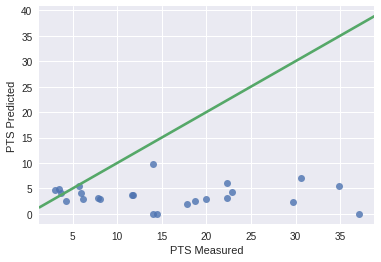

In [354]:
predicted_3l = cross_val_predict(pipeline_3l, X, Y, cv=kfold)
y=Y
predicted=predicted_3l
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [22]:
results

array([ -84.53171539, -374.95825195, -352.42391968, -134.70439148,
         -2.03119516,  -46.08828354, -101.1210022 ,  -77.14952087,
       -468.03222656, -150.98942566])

In [0]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [47]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

Wider: -144.26 (119.56) MSE (10.93) RMSE 


In [48]:
predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

array([ -59.73998642, -308.0574646 , -265.7616272 ,  -79.95090485,
        -47.67246628,   -7.77561522,  -60.86214447,  -49.28014374,
       -346.30636597, -217.20283508])

### Wide Model

Wider: -1.68 (1.91) MSE (1.38) RMSE 


Text(0,0.5,'PTS Predicted')

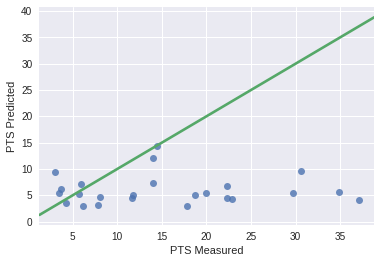

In [353]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [49]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline_w100 = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_100w = cross_val_score(pipeline_w100, X, Y, cv=kfold, n_jobs=1)
print("Wider @ 100 epochs: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_100w.mean(), results_100w.std(), math.sqrt(results_100w.std())))

Wider @ 100 epochs: -184.96 (154.59) MSE (12.43) RMSE 


### Use More layers and more nodes

In [0]:
# define wider model
def deeper_wider_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(100, kernel_initializer='normal', activation='relu'))
	model.add(Dense(3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

In [349]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deeper_wider_model, epochs=50, batch_size=5, verbose=0)))
pipeline_dwr = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
loo = LeaveOneOut()
# results_4l = cross_val_score(pipeline_dwr, X, Y, cv=kfold, n_jobs=1)
print("Deep and Wide cv: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_4l.mean(), results_4l.std(), math.sqrt(results_4l.std())))

Deep and Wide cv: -12.03 (5.10) MSE (2.26) RMSE 


Text(0,0.5,'PTS Predicted')

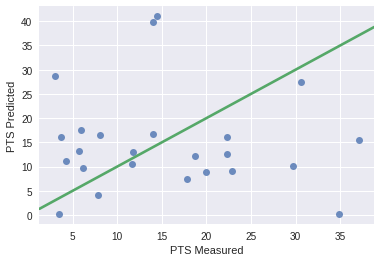

In [350]:
predicted_dwr = cross_val_predict(pipeline_dwr, X, Y, cv=kfold)
y=Y
predicted=predicted_dwr
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

In [0]:
# define wider model
def deep_wide_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

In [342]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_wide_model, epochs=50, batch_size=5, verbose=0)))
pipeline_dw = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
results_dw = cross_val_score(pipeline_dw, X, Y, cv=kfold, n_jobs=1)
print("Deep - Wide cv: %.2f (%.2f)MAE (%.2f) RMSE "  % (results_dw.mean(), results_dw.std(), math.sqrt(results_dw.std())))


Deep - Wide cv: -11.76 (4.81) (2.19) RMSE 


Text(0,0.5,'PTS Predicted')

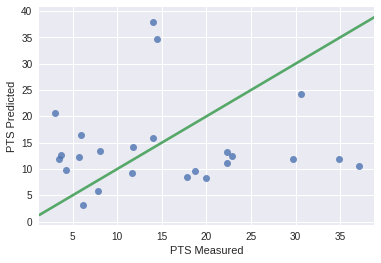

In [344]:
# predicted_dw = cross_val_predict(pipeline_dw, X, Y, cv=kfold)
y=Y
predicted=predicted_dw
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

### Deep Model - Optimized using Mean Square Log error

Wider: -0.86 (0.62) MSE (0.79) RMSE 


Text(0,0.5,'PTS Actual')

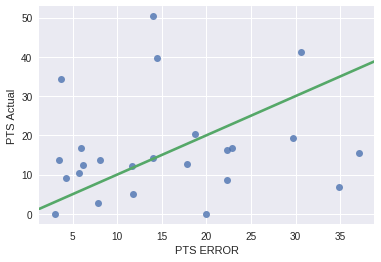

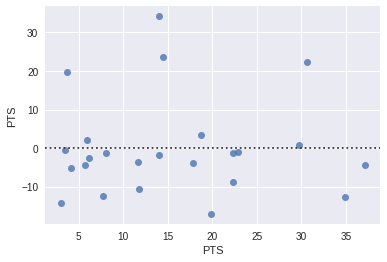

In [29]:
# define wider model
def deep_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
#   model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
	return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model, epochs=200, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) Mean Squared Log Error "  % (results_50w.mean(), results_50w.std()))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)
# y=Y
# predicted=predicted_w
# fig, ax = plt.subplots()
# ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
# sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
# plt.figure()
# # sns.pointplot(Y,predicted-Y)
# ax.set_xlabel('PTS Measured')
# ax.set_ylabel('PTS Predicted')
y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# ax.set_xlabel('PTS Measured')
# ax.set_ylabel('PTS Predicted')
sns.residplot(Y,predicted-Y)
ax.set_xlabel('PTS ERROR')
ax.set_ylabel('PTS Actual')

### Deep Model - using Mean Absolute Error (MAE)

Text(0,0.5,'PTS Predicted')

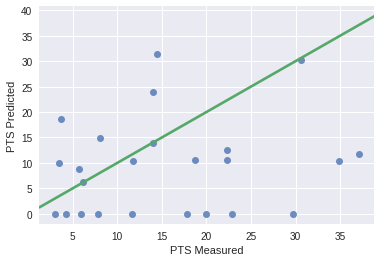

In [20]:
# define wider model
def deep_model():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
#   model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mae', optimizer='adam')
	return model

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model, epochs=50, batch_size=5, verbose=0)))
pipeline_w = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_50w = cross_val_score(pipeline_w, X, Y, cv=kfold, n_jobs=1)
print("Wider: %.2f (%.2f) MSE (%.2f) RMSE "  % (results_50w.mean(), results_50w.std(), math.sqrt(results_50w.std())))

predicted_w = cross_val_predict(pipeline_w, X, Y, cv=kfold)

y=Y
predicted=predicted_w
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
# sns.pointplot(Y,predicted-Y)
ax.set_xlabel('PTS Measured')
ax.set_ylabel('PTS Predicted')

### Deep Model - MSE \*currently best fit*

In [0]:
# define wider model
def deep_model_mse():
	# create model
	model = Sequential()
	model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))
	model.add(Dense(19, kernel_initializer='normal', activation='relu'))

	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='rmsprop')
	return model

Deep - Wide cv: -151.09 (109.54)MSE (10.47) RMSE 


Text(0,0.5,'PTS Actual')

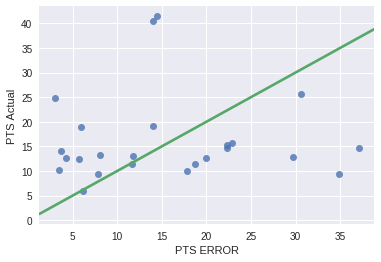

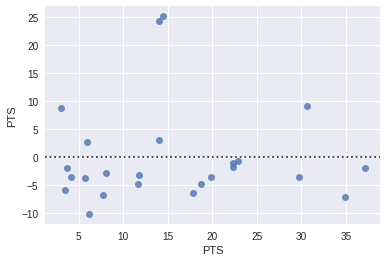

In [0]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_model_mse, epochs=50, batch_size=5, verbose=0)))
pipeline_dmse = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_dmse = cross_val_score(pipeline_dmse, X, Y, cv=kfold, n_jobs=1)
predicted_dmse = cross_val_predict(pipeline_dmse, X, Y, cv=kfold)
print("Deep - Wide cv: %.2f (%.2f)MSE (%.2f) RMSE "  % (results_dmse.mean(), results_dmse.std(), math.sqrt(results_dmse.std())))

y=Y
predicted=predicted_dmse
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
sns.residplot(Y,predicted-Y)
ax.set_xlabel('PTS ERROR')
ax.set_ylabel('PTS Actual')


# Train Final Model using all data for prediction
Now that we've validated the one that performs best in cross validation, which is the deep model 19-19-19-19-19

In [0]:
# Convert dataframe to np array
X = X_pts.iloc[:,0:19]   
Y = Y_pts.iloc[:]

# define final model
def final_model():
  model = deep_model_mse()
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=50, batch_size=5, verbose=0)))
pipeline_f = Pipeline(estimators)

In [0]:
pipeline_f = pipeline_f.fit(X,Y)


Text(0,0.5,'PTS Actual')

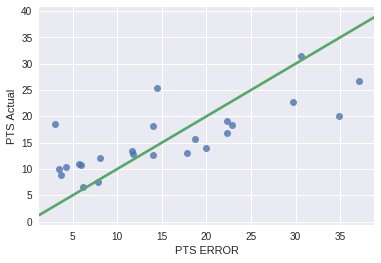

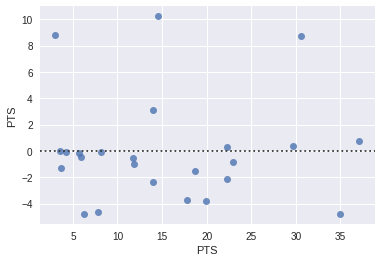

In [60]:
y_fit = pipeline_f.predict(X)
predicted=y_fit
fig, ax = plt.subplots()
ax = sns.regplot(x=Y, y=predicted,fit_reg=False);
sns.regplot(x=Y,y=Y, fit_reg=True, scatter=False, ax=ax);
plt.figure()
sns.residplot(Y,predicted-Y)
ax.set_xlabel('PTS ERROR')
ax.set_ylabel('PTS Actual')
